In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv('Life_Expectancy_Data.csv')

In [22]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [23]:
class Visulation:
    def HeatMap(self,data):
        sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
        plt.show()
    
    def LRScatterGraph(self,y_test,prediction):
        sns.scatterplot(x=y_test,y=prediction)
        plt.show()

In [24]:
def mean_impute(df, cols):
    meanImptr = SimpleImputer()
    for i in cols:
        df[i] = meanImptr.fit_transform(np.array(df[i]).reshape(-1,1))
    return df

In [25]:
def mode_impute(df, cols):
    modeImptr = SimpleImputer(strategy="most_frequent")
    for i in cols:
        df[i] = modeImptr.fit_transform(np.array(df[i]).reshape(-1,1))
    return df

In [26]:
def dropnull(df, n):
    someMissing = []
    aLotMissing = []
    for i in list(df.columns):
        t1 = pd.isna(df[i]).sum()
        if t1>=(n/2):
            aLotMissing.append(i)
            df.drop(i, inplace = True, axis = 1)
        elif t1!=0:
            someMissing.append((i, t1))
    return df, someMissing, aLotMissing

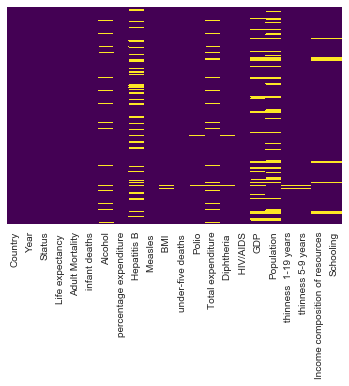

In [27]:
v1 = Visulation()
v1.HeatMap(df)

In [28]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [29]:
df, someMissing, aLotMissing = dropnull(df, len(df['Year']))

In [30]:
print(aLotMissing)

[]


In [31]:
for key, value in someMissing:
    print(key, value)

Life expectancy  10
Adult Mortality 10
Alcohol 194
Hepatitis B 553
 BMI  34
Polio 19
Total expenditure 226
Diphtheria  19
GDP 448
Population 652
 thinness  1-19 years 34
 thinness 5-9 years 34
Income composition of resources 167
Schooling 163


In [32]:
for i in ['Country']:
    df.drop(i, axis=1, inplace=True)

In [33]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [35]:
df.dropna(subset=['Life expectancy '], inplace=True)

In [36]:
list_for_mean_impute = ['Adult Mortality', 'Alcohol', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Hepatitis B', 'Population', 'GDP']

In [37]:
df = mean_impute(df, list_for_mean_impute)

In [38]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [39]:
temp = pd.get_dummies(df['Status'], drop_first=True)
df = pd.concat([df, temp], axis=1).drop('Status', axis=1)

In [40]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [41]:
X = df.drop(['Life expectancy '], axis=1)

In [42]:
y = df['Life expectancy ']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)#, random_state=77)

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
pred = reg.predict(X_test)

In [47]:
print(r2_score(y_test, pred))

0.8125318574218838


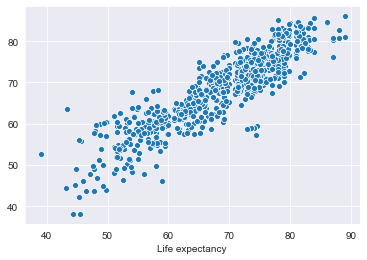

In [48]:
v1.LRScatterGraph(y_test, pred)

In [ ]:
!pip install watson-machine-learning-client

from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials={
    "apikey": "your_apikey",
    "instance_id": "your_instance_id",
    "url": "your_url"
}

client = WatsonMachineLearningAPIClient(wml_credentials)


model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Utkarsh Bhardwaj", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "utkarsh_bt2k18@dtu.ac.in", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy"}


model_artifact =client.repository.store_model(reg, meta_props=model_props)



published_model_uid = client.repository.get_model_uid(model_artifact)



print(published_model_uid)



deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")



scoring_endpoint = client.deployments.get_scoring_url(deployment)



print(scoring_endpoint)